In [8]:
%run '/home/gvolta/XENON1T/Function/Useful/Def.ipynb'
%run '/home/gvolta/XENON1T/Function/Useful/S1PL_Def.ipynb'

Initialization done, Notebook was last run on: 25/11/2019
Initialization for S1PL, Notebook was last run on: 25/11/2019


In [9]:
file_path = '/dali/lgrandi/giovo/pickle_haxcache/pax_v6.10.1/S1PL_data/selected/'
data = pd.read_pickle(file_path + 'bkg_cutted_SR1_S1PL.pkl')
data['CES'] = CES(data, 'cs2_bottom_nn_tf')

In [10]:
import lax
from lax.lichens import postsr1

In [11]:
for i in range(len(data.columns)): print(data.columns[i])

alt_s1_interaction_drift_time
alt_s1_interaction_z
alt_s1_tight_coincidence
alt_s2_interaction_s2_range_50p_area
alt_s2_interaction_s2_range_80p_area
alt_s2_interaction_x
alt_s2_interaction_y
alt_s2_interaction_z
cs1
cs1_nn
cs1_nn_tf
cs1_no_field_corr_nn
cs1_no_field_corr_nn_tf
cs1_no_field_corr_tpf
cs1_tpf
cs2
cs2_bottom
cs2_bottom_nn
cs2_bottom_nn_tf
cs2_bottom_tpf
cs2_nn
cs2_nn_tf
cs2_top
cs2_top_nn
cs2_top_nn_tf
cs2_top_tpf
cs2_tpf
drift_time
event_duration
event_number
event_time
flashing_PMT
flashing_time
flashing_width
inside_flash
largest_coincidence
largest_other_s1
largest_other_s2
largest_other_s2_delay_main_s1
largest_other_s2_delay_main_s2
largest_other_s2_pattern_fit
largest_s2_before_main_s2_area
largest_unknown
largest_veto
nearest_1e5pe_event
nearest_1e6pe_event
nearest_3e5pe_event
nearest_busy
nearest_busy_off
nearest_busy_on
nearest_event
nearest_flash
nearest_hev
nearest_hev_off
nearest_hev_on
nearest_muon_veto_trigger
nearest_s2_area
next_1e5pe_event
next_1e6pe_eve

In [12]:
CutS1PL_HE = postsr1.S1PatternLikelihood_HE()
data = CutS1PL_HE.process(data)

/home/gvolta/.local/lib/python3.4/site-packages/lax-1.7.2-py3.4.egg/lax/lichens/postsr1.py:298: RuntimeWarning: overflow encountered in exp
  return self.popt_z_1[0] + self.popt_z_1[0] *np.exp(-self.popt_z_1[0]*x)
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [13]:
for i in range(len(data.columns)): print(data.columns[i])

alt_s1_interaction_drift_time
alt_s1_interaction_z
alt_s1_tight_coincidence
alt_s2_interaction_s2_range_50p_area
alt_s2_interaction_s2_range_80p_area
alt_s2_interaction_x
alt_s2_interaction_y
alt_s2_interaction_z
cs1
cs1_nn
cs1_nn_tf
cs1_no_field_corr_nn
cs1_no_field_corr_nn_tf
cs1_no_field_corr_tpf
cs1_tpf
cs2
cs2_bottom
cs2_bottom_nn
cs2_bottom_nn_tf
cs2_bottom_tpf
cs2_nn
cs2_nn_tf
cs2_top
cs2_top_nn
cs2_top_nn_tf
cs2_top_tpf
cs2_tpf
drift_time
event_duration
event_number
event_time
flashing_PMT
flashing_time
flashing_width
inside_flash
largest_coincidence
largest_other_s1
largest_other_s2
largest_other_s2_delay_main_s1
largest_other_s2_delay_main_s2
largest_other_s2_pattern_fit
largest_s2_before_main_s2_area
largest_unknown
largest_veto
nearest_1e5pe_event
nearest_1e6pe_event
nearest_3e5pe_event
nearest_busy
nearest_busy_off
nearest_busy_on
nearest_event
nearest_flash
nearest_hev
nearest_hev_off
nearest_hev_on
nearest_muon_veto_trigger
nearest_s2_area
next_1e5pe_event
next_1e6pe_eve

In [15]:
import hax
hax.init(experiment='XENON1T',
         pax_version_policy = 'v6.10.1',
         )

In [16]:
data_cut = hax.cuts.selection(data, data['CutS1PatternLikelihood_HE'] == True, desc='CutS1PatternLikelihood_HE')

CutS1PatternLikelihood_HE selection: 22529 rows removed (96.81% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


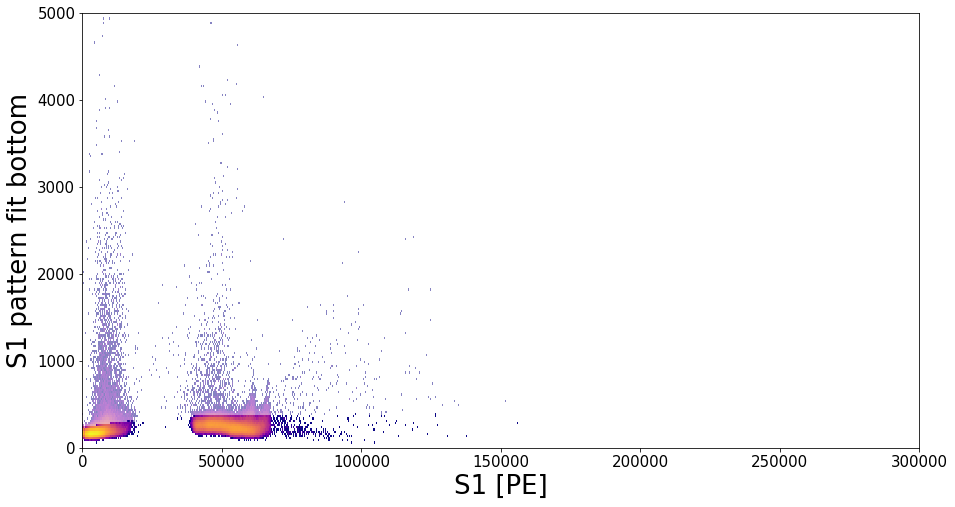

In [20]:
plt.figure(figsize=(15,8))
xbins = np.linspace(0, 3e5, 1000)
ybins = np.linspace(0,5e3, 200)
plt.hist2d(data['s1'], data['s1_pattern_fit_bottom_hax'], bins=[xbins, ybins], 
           # bins=[xbins, ybins], range=((0,7e4), (0,1.5e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.5)
plt.hist2d(data_cut['s1'], data_cut['s1_pattern_fit_bottom_hax'], bins=[xbins, ybins], 
           # bins=[xbins, ybins], range=((0,7e4), (0,1.5e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.colorbar(label='Number of events')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=15)

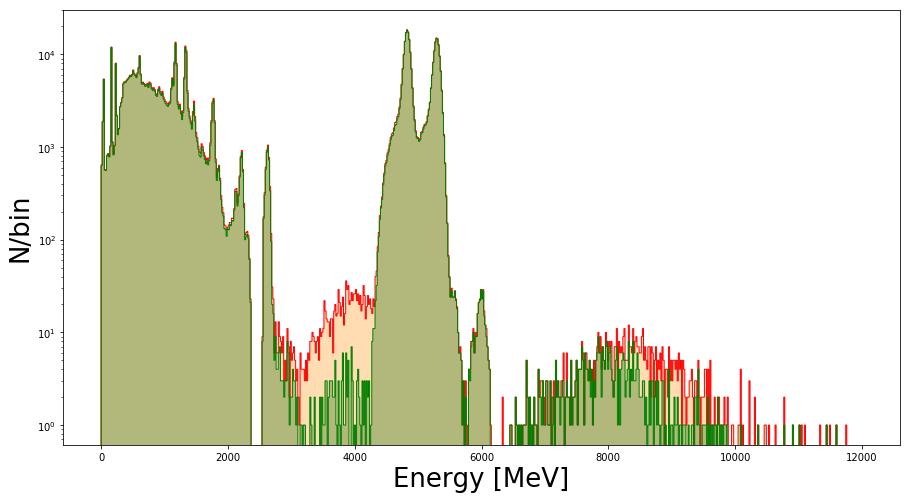

In [22]:
plt.figure(figsize=(15,8))
plt.hist(data['CES']/10**3, bins = (700), 
         range=(0,12000), 
         histtype='bar', color='darkorange',
         alpha = 0.3)
plt.hist(data['CES']/10**3, bins = (700), 
         range=(0,12000), 
         histtype='step', color='red',
         alpha = 1)
plt.xlabel('Energy [MeV]', fontsize=26)
plt.ylabel('N/bin', fontsize=26)
plt.yscale('log')

plt.hist(data_cut['CES']/10**3, bins = (700), 
         range=(0,12000), 
         histtype='bar', color='darkgreen',
         alpha = 0.3)
plt.hist(data_cut['CES']/10**3, bins = (700), 
         range=(0,12000), 
         histtype='step', color='green',
         alpha = 1)
plt.xlabel('Energy [keV]', fontsize=26)
plt.ylabel('N/bin', fontsize=26)
plt.yscale('log')